In [1]:
!pip install tensorflow numpy

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
print("Loading MNIST dataset...")
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


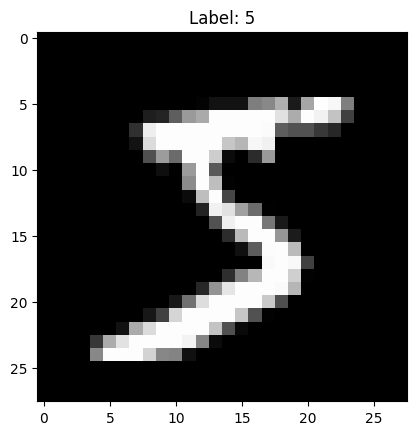

In [4]:
# normalizing the images to a range of 0 to 1 by dividing by 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

print("Compiling the model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("Training the model...")
model.fit(train_images, train_labels, epochs=5)
    

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the model...
Training the model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8569 - loss: 0.4831
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9535 - loss: 0.1588
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9662 - loss: 0.1112
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0870
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0737


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss, test_acc)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')


313/313 - 1s - 2ms/step - accuracy: 0.9778 - loss: 0.0739
0.07391901314258575 0.9778000116348267

Test accuracy: 97.78%


In [11]:
predictions = model.predict(test_images[:1])
print(predictions)
print(f'\n the predicted digit is {predictions[0].argmax()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[2.8628572e-08 2.5791922e-09 5.0871631e-07 6.2372518e-04 5.2173554e-11
  4.9763351e-08 1.0722461e-14 9.9936658e-01 1.7884593e-06 7.2918597e-06]]

 the predicted digit is 7
